In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Tensorflow
import tensorflow as tf
from keras.utils import load_img, img_to_array, to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras import Sequential


# import Dataset
train_df = pd.read_csv('input/Train.csv')
test_df = pd.read_csv('input/Test.csv')

# Exploring the dataset

In [2]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [3]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [4]:
train_df.info(), print('\n'), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null 

(None, None, None)

## Creating the 43 class names

In [5]:
labels = {0:'Speed limit(20km/h)',
          1:'Speed limit(30km/h)',
          2:'Speed limit(50km/h)',
          3:'Speed limit(60km/h)',
          4:'Speed limit(70km/h)',
          5:'Speed limit(80km/h)',
          6:'End of speed limit(80km/h)',
          7:'Speed limit(100km/h)',
          8:'Speed limit(120km/h)',
          9:'No passing',
          10:'No passing for vehicles over 3.5 metric tons',
          11:'Right-of-way at the next intersection',
          12:'Priority road',
          13:'Yield',
          14:'Stop',
          15:'No vehicles',
          16:'Vehicles over 3.5 metric tons prohibted',
          17:'No entry',
          18:'General caution',
          19:'Dangerous curve to the left',
          20:'Dangerous curve to the right',
          21:'Double curve',
          22:'Bumpy road',
          23:'Slippery road',
          24:'Road narrows on the right',
          25:'Road work',
          26:'Traffic signals',
          27:'Pedestrians',
          28:'Children crossing',
          29:'Bicycles crossing',
          30:'Beware of ice/snow',
          31:'Wild animals crossing',
          32:'End of all speed and passing limits',
          33:'Turn right ahead',
          34:'Turn left ahead',
          35:'Ahead only',
          36:'Go straight or right',
          37:'Go straight or left',
          38:'Keep right',
          39:'Keep left',
          40:'Roundabout mandatory',
          41:'End of no passing',
          42:'End of no passing by vehicles over 3.5 metric tons'}

In [6]:
labels.values()

dict_values(['Speed limit(20km/h)', 'Speed limit(30km/h)', 'Speed limit(50km/h)', 'Speed limit(60km/h)', 'Speed limit(70km/h)', 'Speed limit(80km/h)', 'End of speed limit(80km/h)', 'Speed limit(100km/h)', 'Speed limit(120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibted', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons'])

## Modifying the train & test data

In [7]:
# getting only the Path and ClassId 
train_df = train_df[['ClassId', 'Path']]
test_df = test_df[['ClassId', 'Path']]

In [8]:
# add the complete path
train_df['Path'] = train_df['Path'].apply(lambda x: 'input/' + x)
test_df['Path'] = test_df['Path'].apply(lambda x: 'input/' + x)

In [9]:
# Example of the new path in the data
print(f'The new path of the first image in "train_df" : {train_df.Path[0]}')
print(f'The new path of the first image in "test_df" : {test_df.Path[0]}')

The new path of the first image in "train_df" : input/Train/20/00020_00000_00000.png
The new path of the first image in "test_df" : input/Test/00000.png


## Plot some random images

image shape : (57, 56, 3)


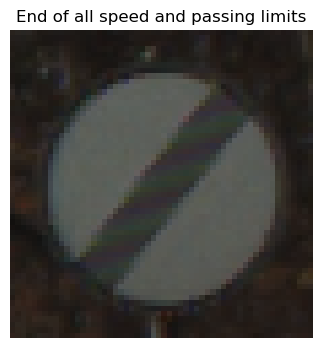

In [10]:
# create a random number
random_nbr = random.randint(1, len(train_df)) # or randint(1, train_df.shape[0]))

# read the images randomly and plot'm
img = plt.imread(train_df.Path[random_nbr]) # read the image from the path
print(f'image shape : {img.shape}') # print the shape of the image
fig, ax = plt.subplots(figsize=(8,4))

ax.imshow(img)
ax.set_title(labels[train_df.ClassId[random_nbr]])
ax.axis('off')
plt.show()

## Preprocessing the images

In [11]:
# Split the data into training and validation sets
train_data = train_df.sample(frac=0.8, random_state=0)
valid_data = train_df.drop(train_df.index)


# Preprocess the data
IMG_SIZE = 32
NUM_CLASSES = len(labels)

def preprocess_data(df):
    X = []
    y = []
    for index, row in df.iterrows():
        img = load_img(row.Path, target_size=(IMG_SIZE, IMG_SIZE))
        img_array = img_to_array(img) / 255.0
        X.append(img_array)
        y.append(to_categorical(row.ClassId, num_classes=NUM_CLASSES))
    return np.array(X), np.array(y)

X_train, y_train = preprocess_data(train_data)
X_valid, y_valid = preprocess_data(valid_data)
X_test, y_test = preprocess_data(test_df)

In [12]:
print(f'The shape of X_train : {X_train.shape}')
print(f'The shape of X_test : {y_train.shape}')

The shape of X_train : (31367, 32, 32, 3)
The shape of X_test : (31367, 43)


# Building the model

## Model 1

In [13]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(128, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

### Fit the model

In [17]:
# fit the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=5)

Epoch 1/5
981/981 [==============================] - 105s 107ms/step - loss: 0.0580 - accuracy: 0.9818
Epoch 2/5
981/981 [==============================] - 99s 101ms/step - loss: 0.0481 - accuracy: 0.9846
Epoch 3/5
981/981 [==============================] - 103s 105ms/step - loss: 0.0413 - accuracy: 0.9867
Epoch 4/5
981/981 [==============================] - 103s 105ms/step - loss: 0.0392 - accuracy: 0.9873
Epoch 5/5
981/981 [==============================] - 102s 104ms/step - loss: 0.0352 - accuracy: 0.9891


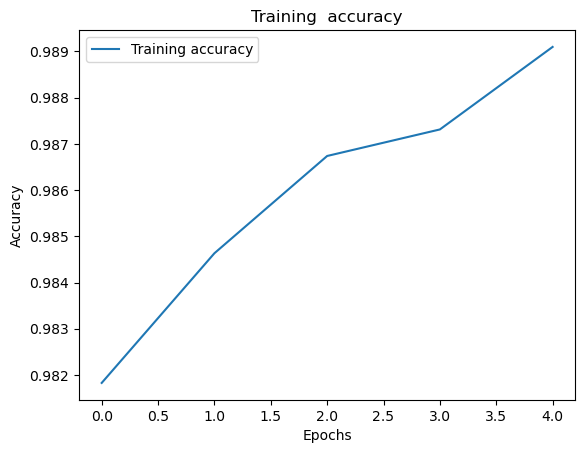

In [26]:
loss_train = history.history['accuracy']
epochs = range(1,11)
plt.plot(loss_train, label='Training accuracy')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy.png')
plt.show()

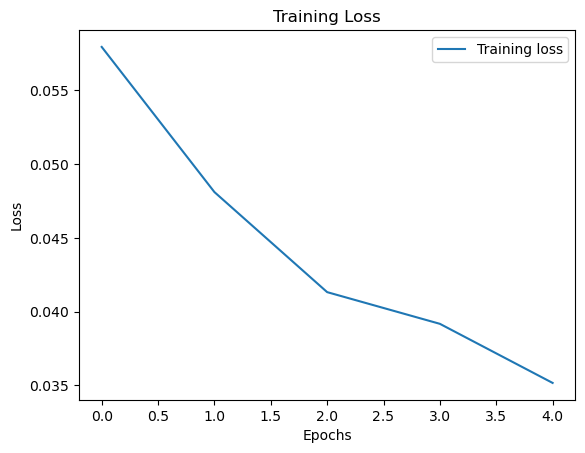

In [25]:
loss_train = history.history['loss']
epochs = range(1,10)
plt.plot( loss_train, label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')
plt.show()

In [ ]:
model.save('traffic_model.h5')

In [ ]:
pip install gradio

In [ ]:
# Creating labels 
labels = {0:'Speed limit(20km/h)',
          1:'Speed limit(30km/h)',
          2:'Speed limit(50km/h)',
          3:'Speed limit(60km/h)',
          4:'Speed limit(70km/h)',
          5:'Speed limit(80km/h)',
          6:'End of speed limit(80km/h)',
          7:'Speed limit(100km/h)',
          8:'Speed limit(120km/h)',
          9:'No passing',
          10:'No passing for vehicles over 3.5 metric tons',
          11:'Right-of-way at the next intersection',
          12:'Priority road',
          13:'Yield',
          14:'Stop',
          15:'No vehicles',
          16:'Vehicles over 3.5 metric tons prohibted',
          17:'No entry',
          18:'General caution',
          19:'Dangerous curve to the left',
          20:'Dangerous curve to the right',
          21:'Double curve',
          22:'Bumpy road',
          23:'Slippery road',
          24:'Road narrows on the right',
          25:'Road work',
          26:'Traffic signals',
          27:'Pedestrians',
          28:'Children crossing',
          29:'Bicycles crossing',
          30:'Beware of ice/snow',
          31:'Wild animals crossing',
          32:'End of all speed and passing limits',
          33:'Turn right ahead',
          34:'Turn left ahead',
          35:'Ahead only',
          36:'Go straight or right',
          37:'Go straight or left',
          38:'Keep right',
          39:'Keep left',
          40:'Roundabout mandatory',
          41:'End of no passing',
          42:'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
model.evaluate(X_test, y_test)

**The model accuracy is 97%**

### Predict and plot the results

In [ ]:
# Get 9 random numbers
rand_img = random.sample(range(len(X_test)), 9)

# Get the predicted labels for the test data
y_pred = model.predict(X_test)

# Plot the images and the predicted labels
fig, axs = plt.subplots(3, 3, figsize=(20, 12))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(X_test[rand_img[i]], cmap=plt.cm.binary)
  pred_label = np.argmax(y_pred[rand_img[i]])
  true_label = np.argmax(y_test[rand_img[i]])

  # Change the color of the titles depending on if the prediction is right or wrong
if pred_label == true_label:
     color = "green"
else:
     color = "red"

  # Set the label text
axs[i].set_title("Pred: {} {:2.0f}% \n(True: {})".format(labels[pred_label],
                                                   100*tf.reduce_max(y_pred),
                                                   labels[true_label]),
             color=color) # set the color to green or red
axs[i].axis('off')
plt.show()


In [ ]:
print()